<a href="https://colab.research.google.com/github/wnoyan/Machine-Learning/blob/master/Predicting%20Diabetes%20using%20KNN%20Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Loading Required Libraries

In [ ]:
# Loading Required Libraries
import numpy as np 
import pandas as pd 
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn import tree

## Mounting Google Drive

In [ ]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Loading Diabetes Dataset from Google Drive

In [ ]:
# Loading Dataset
pima = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/CSE4112 - ML Lab/diabetes.csv", encoding='utf8', engine='python')

# Exploring Dataset
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Feature Selection

In [ ]:
# Feature Selection
feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age', 'Glucose', 'BloodPressure', 'DiabetesPedigreeFunction']

X = pima[feature_cols]
y = pima.Outcome

## Splitting Dataset into training and testing set

In [ ]:
# Splitting Dataset into Training and Testing Set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80% training and 20% test

## Normalizing the dataset

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

X_train[0:4,:]

array([[-0.52639686, -0.70120553, -4.13525578, -1.03594038, -1.15139792,
        -3.75268255, -0.49073479],
       [ 1.58804586, -0.70120553, -0.48916881,  1.48710085, -0.27664283,
         0.68034485,  2.41502991],
       [-0.82846011,  0.01344832, -0.42452187, -0.94893896,  0.56687102,
        -1.2658623 ,  0.54916055],
       [-1.13052335, -0.70120553, -1.30372015,  2.79212217,  1.2541786 ,
        -1.04961706, -0.63929127]])

## KNN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors = 5)
KNN.fit(X_train, y_train)

KNeighborsClassifier()

## Predicting

In [ ]:
Y_pred = KNN.predict(X_test)

## Accuracy & Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix

#Accuray of the Model 
print("Accuracy:", accuracy_score(y_test, Y_pred)*100, "%")
print(confusion_matrix(y_test, Y_pred))

Accuracy: 72.07792207792207 %
[[78 21]
 [22 33]]


## Calculating Error for K Values

In [ ]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))                                     ## np.mean(pred_i != y_test)
    print(np.mean(pred_i != y_test))

0.35064935064935066
0.3246753246753247
0.2922077922077922
0.2857142857142857
0.2792207792207792
0.2597402597402597
0.2662337662337662
0.2597402597402597
0.2662337662337662
0.2532467532467532
0.2792207792207792
0.2662337662337662
0.2727272727272727
0.2532467532467532
0.23376623376623376
0.2727272727272727
0.24675324675324675
0.24025974025974026
0.2597402597402597
0.2662337662337662
0.2662337662337662
0.2532467532467532
0.2662337662337662
0.2727272727272727
0.2662337662337662
0.24675324675324675
0.2792207792207792
0.2662337662337662
0.2727272727272727
0.2532467532467532
0.2597402597402597
0.2532467532467532
0.2532467532467532
0.24675324675324675
0.2532467532467532
0.24675324675324675
0.2597402597402597
0.2532467532467532
0.2597402597402597


## Plotting Error for K Values

Text(0, 0.5, 'Mean Error')

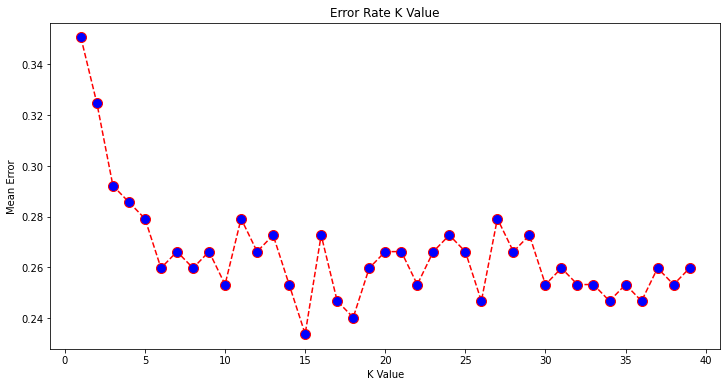

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')